In [37]:
import numpy as np 

import env 
import catalog as Cat
import sham_hack as SHAM
import observables as Obvs

import AbundanceMatching as AM

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [5]:
subs = Cat.SubhaloHistory(sigma_smhm=0.2, smf_source='li-march', nsnap_ancestor=15)
subcat = subs.Read()

In [7]:
msham_z1 = subcat['snapshot15_m.star']
mhalo_z1 = subcat['snapshot15_halo.m']
mmax_z1 = subcat['snapshot15_m.max']

In [12]:
print mmax_z1.min(), mmax_z1.max()

-999.0 14.8677968979


(0.0, 0.5)

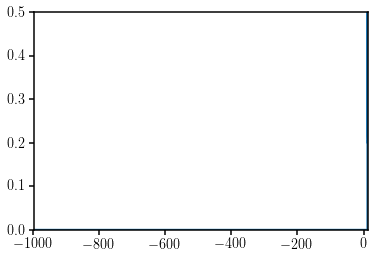

In [9]:
smhmr = Obvs.Smhmr()
mmid, _, sig_logm, cnts = smhmr.Calculate(mmax_z1, msham_z1)

(0.0, 0.5)

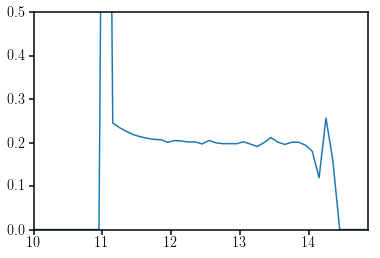

In [13]:
fig = plt.figure()
sub = fig.add_subplot(111)
sub.plot(mmid, sig_logm)
sub.set_xlim([10., mmax_z1.max()])
sub.set_ylim([0., 0.5])

(1e-05, 0.03162277660168379)

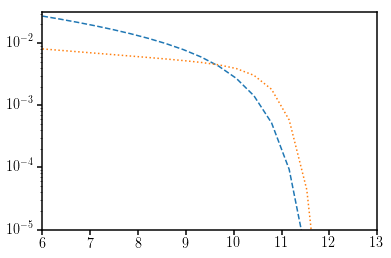

In [120]:
fig = plt.figure()
sub = fig.add_subplot(111)
z = 1.
MF = SHAM.SMFClass('li-march', z, 0.0, 0.7)
sub.plot(np.linspace(6., 13., 20), ([MF.numden(mm) for mm in np.linspace(6., 13., 20)]), ls='--')
sub.plot(np.linspace(6., 13., 20), ([MF.dndm(mm) for mm in np.linspace(6., 13., 20)]), ls=':')
sub.set_xlim([6., 13.])
sub.set_yscale('log')
sub.set_ylim([10**-5., 10**-1.5])

In [147]:
m_arr = np.linspace(6.0, 13.0, 50)
af = AM.AbundanceFunction(m_arr, np.array([MF.dndm(mm) for mm in m_arr]), ext_range=(6., 13.))

(-0.5, 1.0)

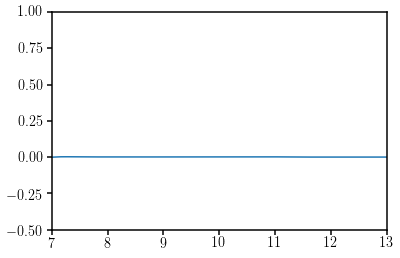

In [148]:
scatter = 0.2
remainder = af.deconvolute(scatter, 20)
x, nd = af.get_number_density_table()
plt.plot(x, remainder/nd)
plt.xlim([7., 13.])
plt.ylim([-0.5, 1.])

In [152]:
nd_halos = AM.calc_number_densities(mmax_z1[mmax_z1 > 10.], 250.)

(1e-06, 0.1)

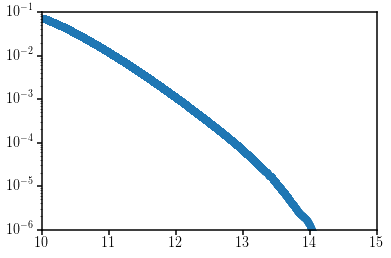

In [126]:
plt.scatter(mmax_z1[mmax_z1 > 10.], nd_halos)
plt.xlim([10., 15.])
plt.yscale('log')
plt.ylim([10.**-6, 10.**-1.])

In [153]:
catalog = af.match(nd_halos)
catalog_sc = af.match(nd_halos, 0.2)

In [154]:
mmaxx = mmax_z1[mmax_z1 > 10.]

print mmaxx[mmaxx > 14.][:100]
print catalog[mmaxx > 14.][:100]
print catalog_sc[mmaxx > 14.][:100]

[ 14.35084152  14.05118179  14.3607626   14.03025436  14.35955811
  14.17448521  14.03647327  14.11604881  14.38211536  14.00261402
  14.05526161  14.04278088  14.12377262  14.02290249  14.01126671
  14.57240772  14.10684776  14.17766953  14.22412014  14.00106144
  14.13287544  14.0567503   14.0436306   14.04491806  14.23825741
  14.00123882  14.0616188   14.15246582  14.09374714  14.26855564
  14.15946865  14.00401592  14.16307735  14.01695919  14.26920891
  14.06487846  14.1334877   14.10947227  14.01413918  14.02991772
  14.11845303  14.07001114  14.34871006  14.60692692  14.01047134
  14.05678654  14.22324085  14.24587631  14.8677969   14.0218153
  14.05629253  14.26641941  14.25381374  14.02118778  14.00643253
  14.00216007]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  